<a href="https://colab.research.google.com/github/karan-2004/sentiment-analysis/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis:**
      A hybrid approach using rule based model and ml model to predict sentiment on app reviews which involves twitter airlines data for training the ml model to test the accuracy while using the different context data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from nltk import download

download('punkt')
download('wordnet')
download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# ***Importing the user review excel data from drive***

In [4]:
location = 'drive/MyDrive/datasets/'
url = location + 'user_review.xls'
reviews = pd.read_excel(url, index_col='id')
reviews = reviews.dropna(axis=0)
print('dimensions', reviews.shape)
reviews.head()

dimensions (50, 1)


,review
id,
1,I love this app! It is so useful and easy to use.
2,Terrible experience. The app crashes all the t...
3,Decent app but needs improvement in the UI.
4,Fantastic! This app has changed my life.
5,"The app is okay, but it lacks many features."


# ***EDA of the reviews***

## ***length of the reviews***

In [5]:
review_lens = reviews.review.str.len()
reviews['length'] = review_lens
print('Shortest review:', min(review_lens), reviews.review[reviews.length.idxmin()])
print('Longest review:', max(review_lens), reviews.review[reviews.length.idxmax()], '\n')
print(reviews.head())

Shortest review: 25 Helpful customer support.
Longest review: 58 I had a bad experience. The customer support is unhelpful. 

                                               review  length
id                                                           
1   I love this app! It is so useful and easy to use.      49
2   Terrible experience. The app crashes all the t...      50
3         Decent app but needs improvement in the UI.      43
4            Fantastic! This app has changed my life.      40
5        The app is okay, but it lacks many features.      44


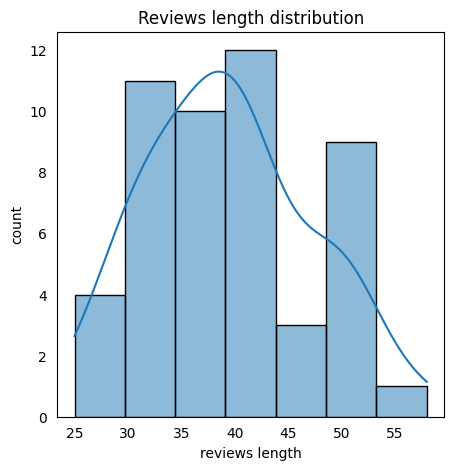

In [6]:
plt.figure(figsize=(5, 5))
sns.histplot(reviews.length, kde=True)
plt.title('Reviews length distribution')
plt.xlabel('reviews length')
plt.ylabel('count')
plt.tick_params(axis='y', left=False)
plt.tick_params(axis='x', bottom=False)
plt.show()

## **Word Cloud of reviews**

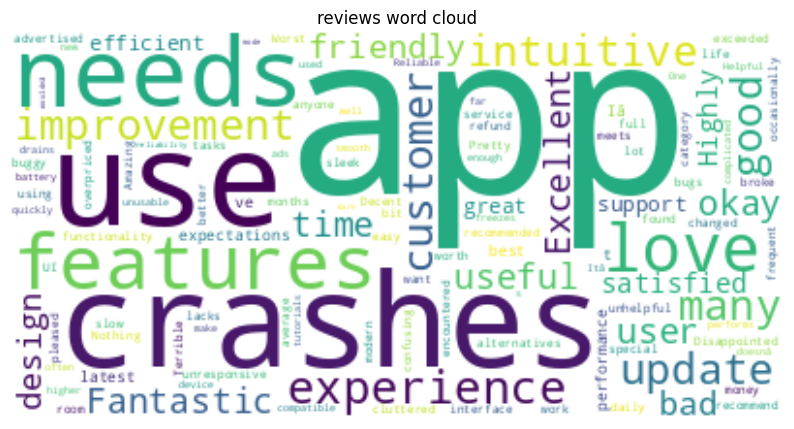

In [7]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(10,15))
cloud = WordCloud(background_color='white', stopwords=set(STOPWORDS), ).generate(' '.join([review for review in reviews.review]))
plt.imshow(cloud, interpolation='bilinear')
plt.title('reviews word cloud')
plt.axis('off')
plt.show()

## ***Tokens***

In [8]:
from nltk.tokenize import word_tokenize

def tokens_cnt(x):
  cleaned_tokens = [token for token in word_tokenize(x) if token.isalpha()]
  return len(cleaned_tokens)

reviews['tokenCnts'] = reviews.review.map(tokens_cnt)
reviews.head()

,review,length,tokenCnts
id,,,
1,I love this app! It is so useful and easy to use.,49,12
2,Terrible experience. The app crashes all the t...,50,8
3,Decent app but needs improvement in the UI.,43,8
4,Fantastic! This app has changed my life.,40,7
5,"The app is okay, but it lacks many features.",44,9


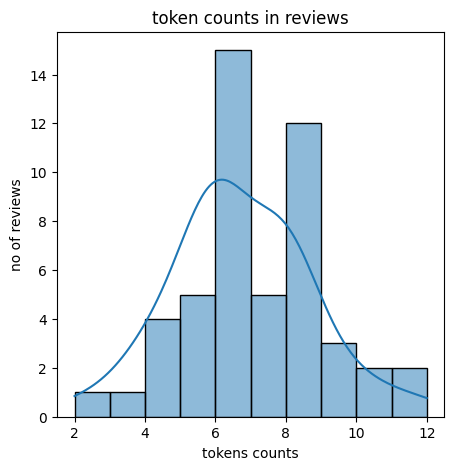

In [9]:
plt.figure(figsize=(5,5))
sns.histplot(reviews.tokenCnts, kde=True)
plt.title('token counts in reviews')
plt.xlabel('tokens counts')
plt.ylabel('no of reviews')
plt.show()

# ***Predicting sentiment with textblob***
A rule based method to predict sentiment

In [10]:
from textblob import TextBlob

def sentiment(x):
  polarity = TextBlob(x).sentiment.polarity

  if polarity < -0.1:
    return 'negative'

  elif polarity > 0.1:
    return 'positive'

  else:
    return 'neutral'

reviews['sentiment'] = reviews.review.map(sentiment)
reviews.head()

,review,length,tokenCnts,sentiment
id,,,,
1,I love this app! It is so useful and easy to use.,49,12,positive
2,Terrible experience. The app crashes all the t...,50,8,negative
3,Decent app but needs improvement in the UI.,43,8,positive
4,Fantastic! This app has changed my life.,40,7,positive
5,"The app is okay, but it lacks many features.",44,9,positive


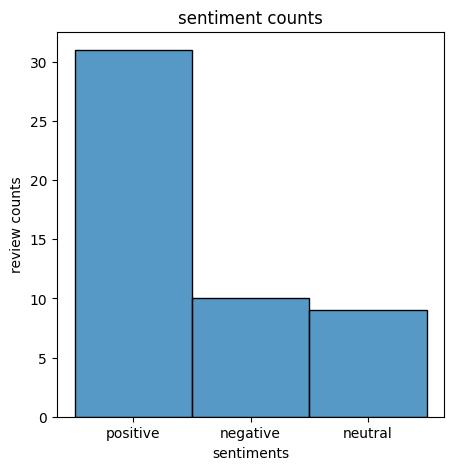

In [11]:
plt.figure(figsize=(5,5))
sns.histplot(reviews.sentiment)
plt.title('sentiment counts')
plt.xlabel('sentiments')
plt.ylabel('review counts')
plt.show()

#**Training a logistic regression model to predict the sentiment with different context data**

using twitter review data to train the model


## **Importing twitter airlines sentiment data**

In [12]:
url = location + 'Tweets.csv'
tweets = pd.read_csv(url)
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [13]:
print('dimensions', tweets.shape)
tweets = tweets[['text', 'airline_sentiment']]
tweets.rename(columns={'text':'review', 'airline_sentiment':'sentiment'}, inplace=True)
tweets.head()

dimensions (14640, 15)


<ipython-input-13-8d10efe67811>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets.rename(columns={'text':'review', 'airline_sentiment':'sentiment'}, inplace=True)


,review,sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


## **Adding few more numerical data**

In [14]:
tweets['length'] = tweets.review.apply(len)
tweets['tokenCnts'] = tweets.review.map(tokens_cnt)
tweets.head()

<ipython-input-14-e4c4ad255fa3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['length'] = tweets.review.apply(len)


,review,sentiment,length,tokenCnts
0,@VirginAmerica What @dhepburn said.,neutral,35,4
1,@VirginAmerica plus you've added commercials t...,positive,72,9
2,@VirginAmerica I didn't today... Must mean I n...,neutral,71,12
3,@VirginAmerica it's really aggressive to blast...,negative,126,17
4,@VirginAmerica and it's a really big bad thing...,negative,55,10


## **transforming into numerical features**

In [15]:
def sentimentToNum(x):
  if x == 'negative':
    return -1
  elif x == 'neutral':
    return 0
  else:
    return 1

y = tweets.sentiment.map(sentimentToNum)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, ENGLISH_STOP_WORDS

tfidf = TfidfVectorizer(stop_words=list(ENGLISH_STOP_WORDS), ngram_range=(1,3), token_pattern=r'\b[^\d\W][^\d\W]+\b', max_features=500)
X_tfidf = tfidf.fit_transform(tweets.review)
vect = CountVectorizer(stop_words=list(ENGLISH_STOP_WORDS), ngram_range=(1,3), token_pattern=r'\b[^\d\W][^\d\W]+\b', max_features=500)
X_count = vect.fit_transform(tweets.review)

X_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
X_count = pd.DataFrame(X_count.toarray(), columns=vect.get_feature_names_out())

X_tfidf = pd.concat([X_tfidf, tweets[['length', 'tokenCnts']]], axis=1)
X_count = pd.concat([X_count, tweets[['length', 'tokenCnts']]], axis=1)

## **Fitting data into Logistic Regression to predict the sentiment**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

model_tfidf = LogisticRegression(max_iter=20000, penalty='l2', C=0.5, multi_class='multinomial', solver='lbfgs')
model_tfidf.fit(X_train, y_train)
y_pred = model_tfidf.predict(X_test)

print('tfidf_accuracy:', accuracy_score(y_test, y_pred))
print('confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Report of tfidf data:\n', classification_report(y_test, y_pred))

X_train, X_test, y_train, y_test = train_test_split(X_count, y, test_size=0.2, random_state=43)

model_count = LogisticRegression(max_iter=20000, penalty='l2', C=.5, multi_class='multinomial', solver='lbfgs')
model_count.fit(X_train, y_train)
y_pred = model_count.predict(X_test)

print('count_accuracy:', accuracy_score(y_test, y_pred))
print('confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Report of count data:\n', classification_report(y_test, y_pred))

tfidf_accuracy: 0.7851775956284153
confusion matrix:
 [[1753   98   38]
 [ 263  272   45]
 [ 121   64  274]]
Report of tfidf data:
               precision    recall  f1-score   support

          -1       0.82      0.93      0.87      1889
           0       0.63      0.47      0.54       580
           1       0.77      0.60      0.67       459

    accuracy                           0.79      2928
   macro avg       0.74      0.66      0.69      2928
weighted avg       0.77      0.79      0.77      2928

count_accuracy: 0.7694672131147541
confusion matrix:
 [[1625  151   52]
 [ 239  333   47]
 [ 109   77  295]]
Report of count data:
               precision    recall  f1-score   support

          -1       0.82      0.89      0.86      1828
           0       0.59      0.54      0.56       619
           1       0.75      0.61      0.67       481

    accuracy                           0.77      2928
   macro avg       0.72      0.68      0.70      2928
weighted avg       0.76      

# Predicting app review data
>Using the tfidf data model which produced more accuracy.

>With more iterations it is possible to attain accuracy more than 8.5

In [18]:
X_tfidf = tfidf.transform(reviews.review)
X_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
X_tfidf = pd.concat([X_tfidf, reviews[['length', 'tokenCnts']]], axis=1)
X_tfidf.drop(0, axis=0, inplace=True)
X_tfidf.fillna(0, inplace=True)

def numToSentiment(x):
  if x == -1:
    return 'negative'
  elif x == 0:
    return 'neutral'
  else:
    return 'positive'

y_pred = model_tfidf.predict(X_tfidf)
reviews['sentiment_ml'] = y_pred
reviews.sentiment_ml = reviews.sentiment_ml.map(numToSentiment)

print('accuracy based on rule based approach', accuracy_score(reviews.sentiment, reviews.sentiment_ml))
print(confusion_matrix(reviews.sentiment, reviews.sentiment_ml))

accuracy based on rule based approach 0.16
[[ 1  5  4]
 [ 1  6  2]
 [21  9  1]]


# **CONCLUSION ON DIFFERENT CONTEXT APPROACH:**
    The hybrid approach shows that the twitter air line reviews data cannot be used for app reviews which sometimes differ in context producing poor results in the other context data.

    Whereas the rule based model is more efficient in smaller data and with less tokens which is even faster.

    Training models based on previously labelled app reviews will yield more accurate outcomes.

# **USING SAME CONTEXT DATA**

> using linkedin reviews data

In [19]:
url = location + 'LINKEDIN_REVIEWS.csv'
linkedin_reviews = pd.read_csv(url)
print(linkedin_reviews.shape)
linkedin_reviews = linkedin_reviews[['review_text', 'review_rating']]
linkedin_reviews.rename(columns={'review_text':'review', 'review_rating':'rating'}, inplace=True)
linkedin_reviews = linkedin_reviews.dropna(axis=0)
print(linkedin_reviews.shape)
linkedin_reviews.head()

(322641, 9)
(320925, 2)


,review,rating
0,Well designed app. It's much easier to use tha...,5
1,Cool!,5
2,Great to finally see this on the market!,5
3,Great app,5
4,Finally! Would love a Homeycomb specific versi...,4


In [20]:
print(linkedin_reviews.info())
linkedin_reviews.columns = linkedin_reviews.columns.str.lower().str.replace(' ', '_')
linkedin_reviews.head()

<class 'pandas.core.frame.DataFrame'>
Index: 320925 entries, 0 to 322640
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   review  320925 non-null  object
 1   rating  320925 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.3+ MB
None


,review,rating
0,Well designed app. It's much easier to use tha...,5
1,Cool!,5
2,Great to finally see this on the market!,5
3,Great app,5
4,Finally! Would love a Homeycomb specific versi...,4


In [21]:
linkedin_reviews['length'] = linkedin_reviews.review.str.len()
linkedin_reviews['tokenCnts'] = linkedin_reviews.review.map(tokens_cnt)
linkedin_reviews.head()

,review,rating,length,tokenCnts
0,Well designed app. It's much easier to use tha...,5,73,15
1,Cool!,5,5,1
2,Great to finally see this on the market!,5,40,8
3,Great app,5,9,2
4,Finally! Would love a Homeycomb specific versi...,4,56,9


In [22]:
def ratingToSentiment(x):
  if x == 1:
    return 'negative'
  elif 2 <= x <= 4:
    return 'neutral'
  else:
    return 'positive'

linkedin_reviews['sentiment'] = linkedin_reviews.rating.map(ratingToSentiment)
linkedin_reviews.head()

,review,rating,length,tokenCnts,sentiment
0,Well designed app. It's much easier to use tha...,5,73,15,positive
1,Cool!,5,5,1,positive
2,Great to finally see this on the market!,5,40,8,positive
3,Great app,5,9,2,positive
4,Finally! Would love a Homeycomb specific versi...,4,56,9,neutral


# **EDA of linkedin_reviews**

In [23]:
print('Shortest review:', f'{min(linkedin_reviews.length)} chars,', linkedin_reviews.review[linkedin_reviews.length.idxmin()])
print('Longest review:', f'{max(linkedin_reviews.length)} chars,', linkedin_reviews.review[linkedin_reviews.length.idxmax()], '\n')

Shortest review: 1 chars, *
Longest review: 4092 chars, Well I'm not here to find a job. I was doing some excellent background checks and found some strange things. I was dating a boy at 17chis name was David Brian Cochran and I wasn't with him long at all. I heard he had some child molesting charges in Boone county Lebanon Indiana. He does. I decided that his charges were said to be the worst case of child abuse in the history of Lebanon Indiana. Everyone knows this charge also included bodily injury and I believe confinement. This 11 yr old child was his own Daughter and she was born very mentally retarded. Her mother Cora, was a paranoid schzophranic but this David Cochran had a child with her. She was mentally ill as well. I knew that a child between them wouldn't be ok. They had no right to have unprotected relations knowing Cora Sanders was so disturbed herself. I do think after all that David B Cochran has done that he likely forced her into sex ! Well his profile lead me to his

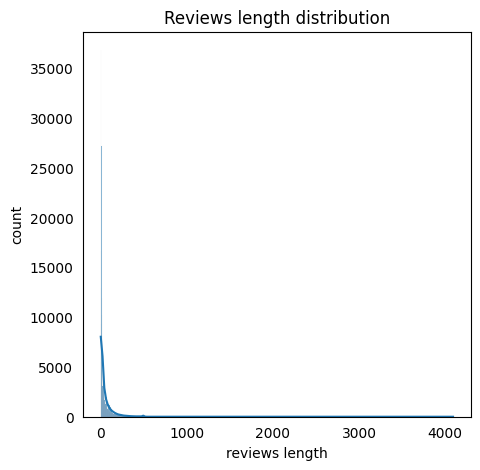

In [24]:
plt.figure(figsize=(5, 5))
sns.histplot(linkedin_reviews.length, kde=True)
plt.title('Reviews length distribution')
plt.xlabel('reviews length')
plt.ylabel('count')
plt.tick_params(axis='y', left=False)
plt.tick_params(axis='x', bottom=False)
plt.show()

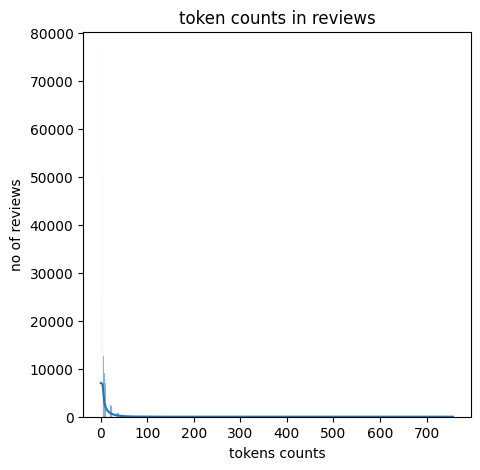

In [25]:
plt.figure(figsize=(5,5))
sns.histplot(linkedin_reviews.tokenCnts, kde=True)
plt.title('token counts in reviews')
plt.xlabel('tokens counts')
plt.ylabel('no of reviews')
plt.show()

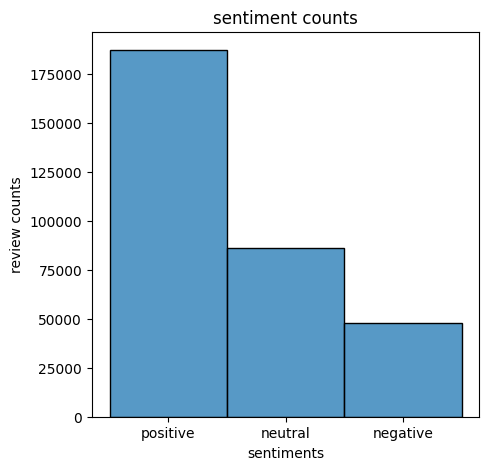

In [26]:
plt.figure(figsize=(5,5))
sns.histplot(linkedin_reviews.sentiment)
plt.title('sentiment counts')
plt.xlabel('sentiments')
plt.ylabel('review counts')
plt.show()

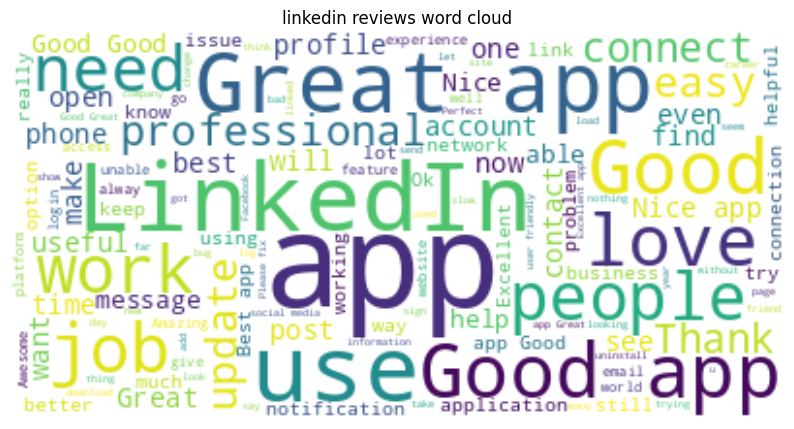

In [27]:
plt.figure(figsize=(10,15))
cloud = WordCloud(background_color='white', stopwords=set(STOPWORDS), ).generate(' '.join([review for review in linkedin_reviews.review]))
plt.imshow(cloud, interpolation='bilinear')
plt.title('linkedin reviews word cloud')
plt.axis('off')
plt.show()

# **More numericals in linkedin_reviews**

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, ENGLISH_STOP_WORDS


tfidf = TfidfVectorizer(stop_words=list(ENGLISH_STOP_WORDS), ngram_range=(1,3), token_pattern=r'\b[^\d\W][^\d\W]+\b', max_features=2500)
X_tfidf = tfidf.fit_transform(linkedin_reviews.loc[:(10**5)-1, 'review'])
vect = CountVectorizer(stop_words=list(ENGLISH_STOP_WORDS), ngram_range=(1,3), token_pattern=r'\b[^\d\W][^\d\W]+\b', max_features=2500)
X_count = vect.fit_transform(linkedin_reviews.loc[:(10**5)-1, 'review'])

X_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
X_count = pd.DataFrame(X_count.toarray(), columns=vect.get_feature_names_out())


X_tfidf = pd.concat([X_tfidf, linkedin_reviews[['length', 'tokenCnts']][:98383]], axis=1)
X_count = pd.concat([X_count, linkedin_reviews[['length', 'tokenCnts']][:98383]], axis=1)


y = linkedin_reviews.sentiment.map(sentimentToNum)
y = y.iloc[:98383]

X_tfidf = X_tfidf[:][:-1616]
X_count = X_count[:][:-1616]
X_tfidf.fillna(0, inplace=True)
X_count.fillna(0, inplace=True)

# **Fitting the model using logistic regression model**

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
model_tfidf = LogisticRegression(max_iter=1000, penalty='l2', C=1, multi_class='multinomial', solver='lbfgs')
model_tfidf.fit(X_train, y_train)
y_pred = model_tfidf.predict(X_test)

print('tfidf_accuracy:', accuracy_score(y_test, y_pred))
print('confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Report of tfidf data:\n', classification_report(y_test, y_pred))

# X_train, X_test, y_train, y = train_test_split(X_count, y, test_size=0.2, random_state=43)
# model_count = LogisticRegression(max_iter=10000, penalty='l2', C=.1, multi_class='multinomial', solver='lbfgs')
# model_count.fit(X_train, y_train)
# y_pred = model_count.predict(X_test)

# print('count_accuracy:', accuracy_score(y_test, y_pred))
# print('confusion matrix:\n', confusion_matrix(y_test, y_pred))
# print('Report of count data:\n', classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


tfidf_accuracy: 0.6586369873456319
confusion matrix:
 [[1399  988  284]
 [ 534 3499 3682]
 [  56 1173 8062]]
Report of tfidf data:
               precision    recall  f1-score   support

          -1       0.70      0.52      0.60      2671
           0       0.62      0.45      0.52      7715
           1       0.67      0.87      0.76      9291

    accuracy                           0.66     19677
   macro avg       0.66      0.62      0.63     19677
weighted avg       0.65      0.66      0.64     19677



## **Predictions**

In [50]:
X_tfidf = tfidf.transform(reviews.review)
X_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
X_tfidf = pd.concat([X_tfidf, reviews[['length', 'tokenCnts']]], axis=1)
X_tfidf.drop(0, axis=0, inplace=True)
X_tfidf.fillna(0, inplace=True)

def numToSentiment(x):
  if x == -1:
    return 'negative'
  elif x == 0:
    return 'neutral'
  else:
    return 'positive'

y_pred = model_tfidf.predict(X_tfidf)
reviews['sentiment_ml_context'] = y_pred
reviews.sentiment_ml_context = reviews.sentiment_ml_context.map(numToSentiment)

print('accuracy based on reference to rule based approach', accuracy_score(reviews.sentiment, reviews.sentiment_ml_context))
print(confusion_matrix(reviews.sentiment, reviews.sentiment_ml_context))

accuracy based on reference to rule based approach 0.38
[[ 0  6  4]
 [ 0  5  4]
 [ 5 12 14]]
